# Bayesian Statistics

While preparing codes, I have utilized following source: https://app.datacamp.com/learn/courses/bayesian-data-analysis-in-python

In [1]:
#pip install pymc3

In [2]:
import pymc3 as pm

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
iris = sns.load_dataset('iris')

In [5]:
pd.options.display.max_rows = 50

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
formula = "sepal_length ~ sepal_width"

with pm.Model() as model_1:
    
    pm.GLM.from_formula(formula, data=iris)
    trace_1 = pm.sample(draws=1000, tune=500, chains=12)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (12 chains i

Sampling 12 chains for 500 tune and 1_000 draw iterations (6_000 + 12_000 draws total) took 1016 seconds.
The acceptance probability does not match the target. It is 0.8867928114805556, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8947530388865675, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8865766210041841, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8904576262728382, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8923082163723427, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8944292539556651, but should be close to 0.8. Try to increase the number

<ipython-input-8-406a7be3e6ef>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_1 ,figsize=(10,10))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

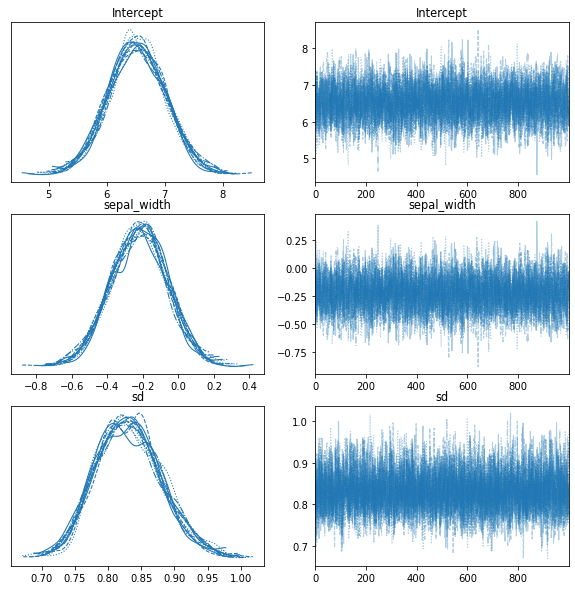

In [8]:
pm.traceplot(trace_1 ,figsize=(10,10))

<ipython-input-9-aa4ac5b60c93>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_1, figsize=(10,10))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

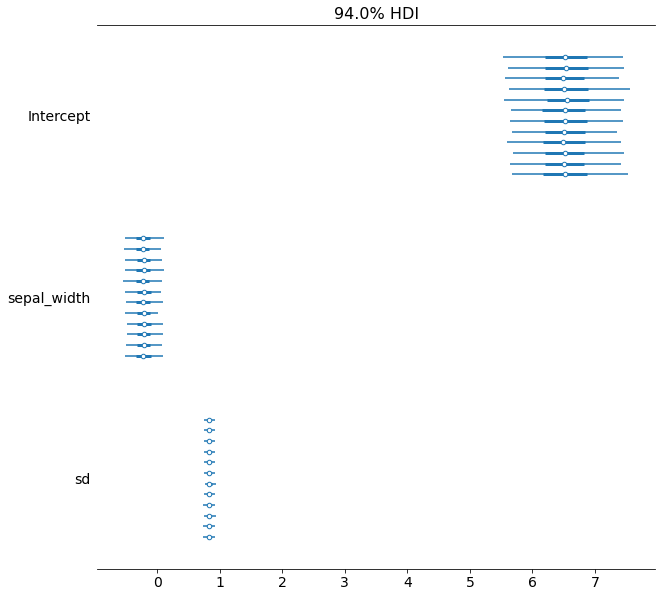

In [9]:
pm.forestplot(trace_1, figsize=(10,10))

For other arguments of pmyc3 plots, please visit: https://pymc3-testing.readthedocs.io/en/rtd-docs/api/plots.html

In [10]:
pm.summary(trace_1)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.522,0.491,5.626,7.466,0.008,0.005,4053.0,4153.0,1.0
sepal_width,-0.222,0.159,-0.524,0.072,0.003,0.002,4031.0,4177.0,1.0
sd,0.832,0.049,0.738,0.923,0.001,0.000,5288.0,4834.0,1.0


#### For the intercept (as an example):
- **mean**: The mean (average) value of the intercept is 6.522.
- **sd (Standard Deviation)**: The standard deviation of the intercept is 0.491, indicating the spread of the intercept's values.
- **hdi_3%**: The lower bound of the Highest Density Interval (HDI) for the intercept is 5.626. This represents the lower end of the interval within which 94% of the values lie.
- **hdi_97%**: The upper bound of the HDI for the intercept is 7.466. This represents the upper end of the interval within which 94% of the values lie.
- **mcse_mean (Monte Carlo Standard Error for mean)**: The MCSE for the mean of the intercept is 0.008, indicating the uncertainty in the estimate of the mean.
- **mcse_sd (Monte Carlo Standard Error for standard deviation)**: The MCSE for the standard deviation of the intercept is 0.005.
- **ess_bulk (Effective Sample Size for bulk)**: The ESS for the bulk of the distribution for the intercept is 4053.0, indicating the number of effective samples used to calculate the bulk of the distribution.
- **ess_tail (Effective Sample Size for tail)**: The ESS for the tail of the distribution for the intercept is 4153.0.
- **r_hat**: The potential scale reduction factor on split chains (r_hat) for the intercept is 1.0, indicating convergence of the chains (values close to 1.0 indicate good mixing and convergence).


**Bulk**: This usually refers to the central mass or the main body of the distribution. Effective Sample Size (ESS) for the bulk provides a measure of how many independent and identically distributed samples would be equivalent to the correlated samples in the central part of the posterior distribution. It is a way to quantify the amount of "information" that the sample contains about the central tendency of the parameter's distribution.

**Tail**: This refers to the outer sections of the distribution, away from the median, often associated with the extremes or the tails of the distribution. The ESS for the tail provides a measure of the number of independent samples equivalent to the correlated samples in the tails of the posterior distribution. It is important for understanding the uncertainty in the extremes of the distribution, which can be critical for evaluating risks or rare events.

In Bayesian analysis, having a high ESS for both the bulk and the tail of the distribution is important because it indicates that the Markov Chain Monte Carlo (MCMC) simulation has effectively explored the parameter space, providing a reliable approximation of the posterior distribution.

In [11]:
formula = "sepal_length ~ petal_length + petal_width"

with pm.Model() as model_2:
    
    pm.GLM.from_formula(formula, data=iris)
    trace_2 = pm.sample(draws=1000, tune=500, chains=12)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (12 chains i

Sampling 12 chains for 500 tune and 1_000 draw iterations (6_000 + 12_000 draws total) took 1133 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9042280967634511, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9028238997033002, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.886850256274289, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8986626531346482, but should be close to 0.8. Try to increase the number of tuning steps.


<ipython-input-12-bbe4b95c3c98>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_2 ,figsize=(12,12))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

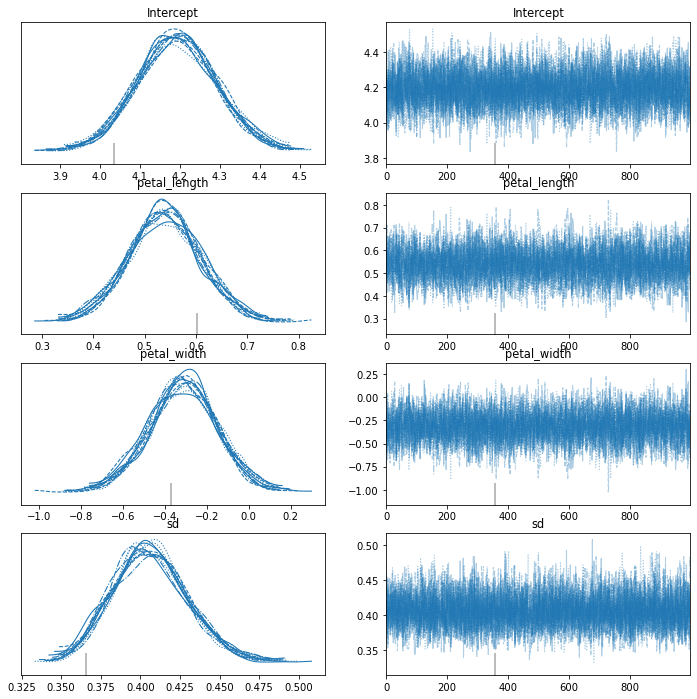

In [12]:
pm.traceplot(trace_2 ,figsize=(12,12))

<ipython-input-13-fa3eaeb56dca>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_2, figsize=(10,10))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

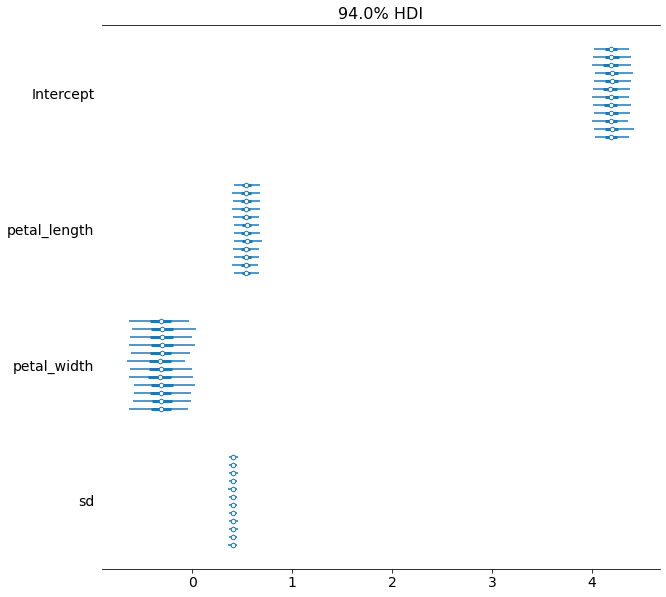

In [13]:
pm.forestplot(trace_2, figsize=(10,10))

In [14]:
pm.summary(trace_2)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,4.194,0.099,4.014,4.390,0.001,0.001,4901.0,5182.0,1.0
petal_length,0.539,0.070,0.405,0.670,0.001,0.001,3975.0,4355.0,1.0
petal_width,-0.313,0.162,-0.628,-0.013,0.002,0.002,4286.0,5101.0,1.0
sd,0.406,0.024,0.362,0.451,0.000,0.000,6318.0,5560.0,1.0


In [15]:
#model1_loo = az.loo(trace_1, model_1)
#model2_loo = az.loo(trace_2, model_2)
#df_comp_loo = az.compare({"model_1": trace_1, "model_2": trace_2})
#az.plot_compare(df_comp_loo, insample_dev=False);

In [16]:
formula = "sepal_length ~ sepal_width"

with pm.Model() as model_3:
    
    pm.GLM.from_formula(formula, data=iris)
    trace_3 = pm.sample(draws=1000, tune=500, chains=12)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_3)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (12 chains i

Sampling 12 chains for 500 tune and 1_000 draw iterations (6_000 + 12_000 draws total) took 989 seconds.
The acceptance probability does not match the target. It is 0.8883660332192518, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8943761091294835, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9045251861251381, but should be close to 0.8. Try to increase the number of tuning steps.


In [17]:
print(posterior_predictive['y'])

[[4.64555298 6.06757705 5.05011277 ... 6.95826852 4.28816315 6.96864159]
 [4.8086505  6.6889024  4.33831856 ... 7.51608938 6.77153148 6.50850979]
 [6.77215602 6.28164326 5.30240227 ... 5.52492908 5.0937128  4.9098699 ]
 ...
 [4.80993868 5.9765808  5.26425416 ... 6.17081296 4.94344329 6.14541848]
 [6.43547274 6.27571587 5.10446494 ... 4.94460375 6.44927028 5.76304513]
 [4.91052345 4.4521662  6.23597567 ... 4.60325477 5.45225852 5.74829011]]


#### Now we have a distribution for each observation

<AxesSubplot:title={'center':'x'}>

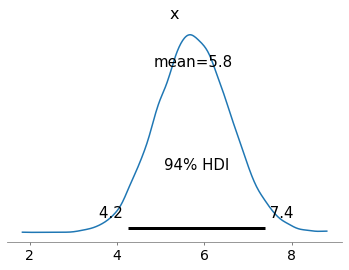

In [18]:
pm.plot_posterior(posterior_predictive['y'][:,0])

<AxesSubplot:title={'center':'x'}>

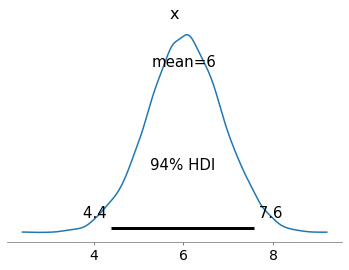

In [19]:
pm.plot_posterior(posterior_predictive['y'][:,119])

In [20]:
len(posterior_predictive['y'][:,119]) #12000 = 1000 draws * 12 chains

12000

In [21]:
errors=[]
for index, observation in iris.iterrows():
    error=posterior_predictive['y'][:,index] - observation['sepal_length']
    errors.append(error)
    
error_distribution=np.array(errors).reshape(-1)
error_distribution.shape

(1800000,)

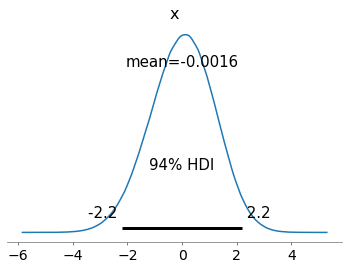

In [22]:
# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

### Assign prior distributions

https://docs.pymc.io/en/latest/api/distributions/generated/pymc.Binomial.html

In [124]:
Y = iris['sepal_length']
X1 = iris['sepal_width']
X2 = iris['petal_length']
X3 = iris['petal_width']

with pm.Model() as model_4:
    beta0 = pm.Normal("beta0", 0.0, 1.0) #Change to uniform distribution to see what happens (gamma, halfnormal, uniform, etc.)
    beta1 = pm.Normal("beta1", 0.0, 1.0)
    beta2 = pm.Normal("beta2", 0.0, 1.0)
    beta3 = pm.Normal("beta3", 0.0, 1.0)

    mean_y = beta0 + beta1 * X1 + beta2 * X2 + beta3 * X3
 
    pm.Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)
    trace_4 = pm.sample(draws=100, tune=50, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_4)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta3, beta2, beta1, beta0]


Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 473 seconds.
The acceptance probability does not match the target. It is 0.9473943708106037, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9370235722307383, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


<ipython-input-125-6d67bfd10b21>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_4 ,figsize=(15,15))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'beta0'}>,
        <AxesSubplot:title={'center':'beta0'}>],
       [<AxesSubplot:title={'center':'beta1'}>,
        <AxesSubplot:title={'center':'beta1'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'beta3'}>,
        <AxesSubplot:title={'center':'beta3'}>]], dtype=object)

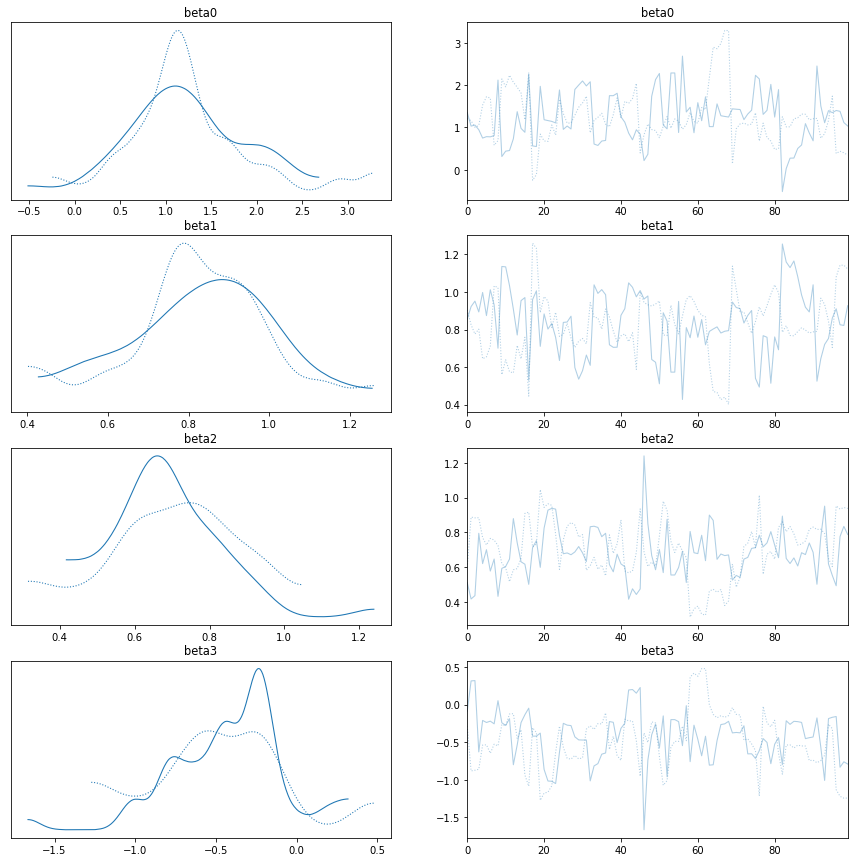

In [125]:
pm.traceplot(trace_4 ,figsize=(15,15))

The prior belief changes the outcome. That's how, we think of Bayes as a degree of belief

#### Updating priors


https://docs.pymc.io/en/v3/pymc-examples/examples/pymc3_howto/updating_priors.html

We want to keep probability density of posterior draws, following function does so, by using kernel density estimation. Function takes samples, and convert them into distributions.

In [126]:
def from_posterior(param, samples):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = stats.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return Interpolated(param, x, y)

Store means of coefficients, from the posterior draws of the model above.

In [127]:
beta0_true = np.mean(trace_4.get_values('beta0'))
beta1_true = np.mean(trace_4.get_values('beta1'))
beta2_true = np.mean(trace_4.get_values('beta2'))
beta3_true = np.mean(trace_4.get_values('beta3'))

print(beta0_true,beta1_true,beta2_true,beta3_true)

1.2371858081456046 0.8322662171675771 0.6951274590245745 -0.45889253418684794


In [128]:
len(trace_4.get_values('beta0'))

200

Now we will use posterior draws of previous model as priors of a new model.

In [129]:
from pymc3 import Model, Normal, Slice, sample
from scipy import stats
from pymc3.distributions import Interpolated

traces =  [trace_4]

model = Model()
with model:
    # Priors are posteriors from previous iteration
    beta0 = from_posterior("beta0", trace_4["beta0"])
    beta1 = from_posterior("beta1", trace_4["beta1"])
    beta2 = from_posterior("beta2", trace_4["beta2"])
    beta3 = from_posterior("beta3", trace_4["beta3"])

    # Expected value of outcome
    mean_y = beta0 + beta1 * X1 + beta2 * X2 + beta3 * X3

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)

    # draw 100 posterior samples
    trace = pm.sample(draws=100, tune=50, chains=2)

    traces.append(trace)

C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta3, beta2, beta1, beta0]


Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 144 seconds.
The acceptance probability does not match the target. It is 0.9278785872106816, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9261594722025318, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.


Posterior distributions after 2 iterations.


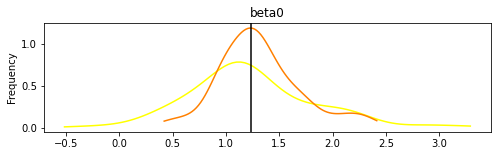

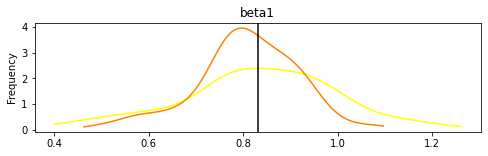

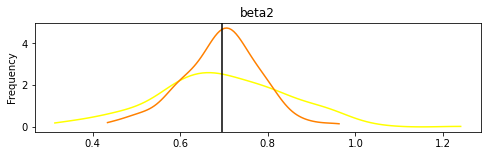

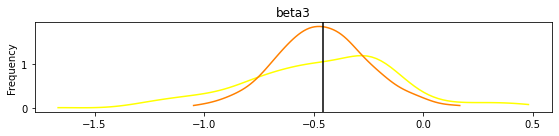

In [130]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print("Posterior distributions after " + str(len(traces)) + " iterations.")
cmap = mpl.cm.autumn
for param in ["beta0", "beta1", "beta2", "beta3"]:
    plt.figure(figsize=(8, 2))
    for update_i, trace in enumerate(traces):
        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)
        plt.plot(x, y, color=cmap(1 - update_i / len(traces))) #in each step color gets from yellow to red
    plt.axvline({"beta0": beta0_true, "beta1": beta1_true, "beta2": beta2_true, "beta3": beta3_true}[param], c="k")
    plt.ylabel("Frequency")
    plt.title(param)

plt.tight_layout()

In [131]:
for _ in range(10):

    model = Model()
    with model:
        # Priors are posteriors from previous iteration
        beta0 = from_posterior("beta0", traces[1]["beta0"])
        beta1 = from_posterior("beta1", traces[1]["beta1"])
        beta2 = from_posterior("beta2", traces[1]["beta2"])
        beta3 = from_posterior("beta3", traces[1]["beta3"])

        # Expected value of outcome
        mean_y = beta0 + beta1 * X1 + beta2 * X2 + beta3 * X3

        # Likelihood (sampling distribution) of observations
        Y_obs = Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)

        # draw 10000 posterior samples
        trace = pm.sample(draws=100, tune=50, chains=2)
        traces.append(trace)

C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta3, beta2, beta1, beta0]


Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 98 seconds.
The acceptance probability does not match the target. It is 0.9512007824843697, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9358885766865067, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered i

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 110 seconds.
The acceptance probability does not match the target. It is 0.9522016849270969, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.954947911285362, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered i

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 85 seconds.
The acceptance probability does not match the target. It is 0.9067951374841513, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9398463933980414, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaco

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 85 seconds.
The acceptance probability does not match the target. It is 0.9283921891676462, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9270273413953148, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered i

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 93 seconds.
The acceptance probability does not match the target. It is 0.9081098205619164, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.944482259043145, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 84 seconds.
The acceptance probability does not match the target. It is 0.9280551649898502, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9252622940478469, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initiali

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 95 seconds.
The acceptance probability does not match the target. It is 0.9371627198719039, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9532842980258203, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\t

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 80 seconds.
The acceptance probability does not match the target. It is 0.9191407962796677, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.932507867807385, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 93 seconds.
The acceptance probability does not match the target. It is 0.9565080789795505, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9471239001738936, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initiali

Sampling 2 chains for 50 tune and 100 draw iterations (100 + 200 draws total) took 88 seconds.
The acceptance probability does not match the target. It is 0.9459960143123175, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9328299557764973, but should be close to 0.8. Try to increase the number of tuning steps.


Posterior distributions after 12 iterations.


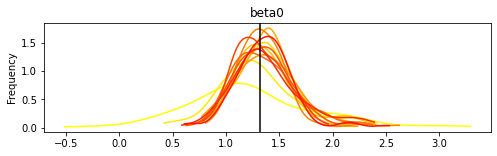

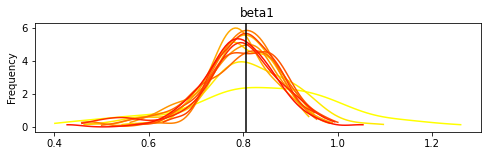

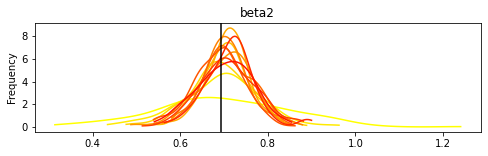

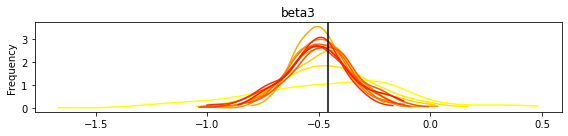

In [132]:
beta0_true = np.mean(traces[1].get_values('beta0'))
beta1_true = np.mean(traces[1].get_values('beta1'))
beta2_true = np.mean(traces[1].get_values('beta2'))
beta3_true = np.mean(traces[1].get_values('beta3'))


print("Posterior distributions after " + str(len(traces)) + " iterations.")
cmap = mpl.cm.autumn
for param in ["beta0", "beta1", "beta2", "beta3"]:
    plt.figure(figsize=(8, 2))
    for update_i, trace in enumerate(traces):
        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)
        plt.plot(x, y, color=cmap(1 - update_i / len(traces))) #in each step color gets from yellow to red
    plt.axvline({"beta0": beta0_true, "beta1": beta1_true, "beta2": beta2_true, "beta3": beta3_true}[param], c="k")
    plt.ylabel("Frequency")
    plt.title(param)

plt.tight_layout()

In [133]:
traces


[<MultiTrace: 2 chains, 100 iterations, 4 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>,
 <MultiTrace: 2 chains, 100 iterations, 8 variables>]

In [134]:
traces[1].varnames


['beta0_interval__',
 'beta1_interval__',
 'beta2_interval__',
 'beta3_interval__',
 'beta0',
 'beta1',
 'beta2',
 'beta3']

In [135]:
final_trace = traces[9]


In [136]:
pm.summary(final_trace)


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MKINA18\AppData\Local\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,1.309,0.233,0.964,1.799,0.023,0.017,98.0,96.0,1.00
beta1,0.809,0.067,0.701,0.948,0.008,0.006,77.0,85.0,1.01
beta2,0.710,0.066,0.567,0.809,0.009,0.006,60.0,31.0,1.01
beta3,-0.511,0.156,-0.822,-0.244,0.021,0.015,58.0,42.0,1.02


#### Prediction for different invasion counts

In [137]:
intercept_mean = np.mean(final_trace.get_values('beta0')) 
beta_1_mean = np.mean(final_trace.get_values('beta1')) 
beta_2_mean = np.mean(final_trace.get_values('beta2')) 
beta_3_mean = np.mean(final_trace.get_values('beta3')) 

In [138]:
predicted_Y = {}
for X1_dynamic in range(0,5):
    pred_mean = intercept_mean + beta_1_mean * X1_dynamic + beta_2_mean * X2.mean() + beta_3_mean * X3.mean()
    Y_pred = np.random.normal(pred_mean, sd_mean, size=100)
    predicted_Y.update({X1_dynamic: Y_pred})

<ipython-input-139-99bdc8ca60a5>:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(predicted_Y)


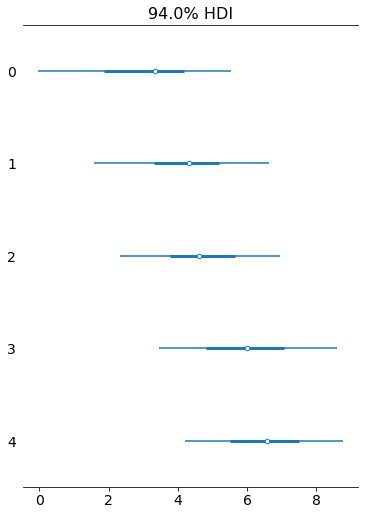

In [139]:
# Draw a forest plot of predicted BF for all invasions
pm.forestplot(predicted_Y)
plt.show()

In [140]:
print(pm.hdi(predicted_Y[4], hdi_prob=0.94)) #Change the hdi limitsY

[4.20093669 8.7551509 ]


By additional invasions, the mean of expected Bolsa Familia increases. However, uncertainity about the Bolsa Familia increases as well.